In [5]:
from paths import PROCESSED_DATASET_PATH, RAW_DATASET_PATH
from ml.dataset import TrainingDataset
import torch
from torch_geometric.data.storage import BaseStorage, NodeStorage, EdgeStorage
from ml.inference import TORCH


torch.serialization.add_safe_globals([BaseStorage, NodeStorage, EdgeStorage])
dataset = TrainingDataset(RAW_DATASET_PATH, PROCESSED_DATASET_PATH, 1)

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

v = list()
e = list()
all_graph = list()
for graph in dataset:
    pc_v_num = graph[TORCH.path_condition_vertex].x.shape[0]
    other_v_num = (
        graph[TORCH.game_vertex].x.shape[0] + graph[TORCH.state_vertex].x.shape[0]
    )
    pc_e_num = (
        graph[TORCH.pathcondvertex_to_pathcondvertex].edge_index.shape[1]
        + graph[TORCH.pathcondvertex_to_statevertex].edge_index.shape[1] * 2
    )
    other_e_num = (
        graph[TORCH.statevertex_parentof_statevertex].edge_index.shape[1]
        + graph[TORCH.gamevertex_to_gamevertex].edge_index.shape[1]
        + graph[TORCH.statevertex_in_gamevertex].edge_index.shape[1] * 2
        + graph[TORCH.statevertex_history_gamevertex].edge_index.shape[1] * 2
    )
    v.append(pc_v_num / other_v_num)
    e.append(pc_e_num / other_e_num)
    all_graph.append((pc_v_num + pc_e_num) / (other_v_num + other_e_num))

df = pd.DataFrame({"v": v, "e": e, "all" : all_graph})

In [50]:
df.mean()

v      34.911257
e      36.449899
all    36.099544
dtype: float64

In [26]:
df.var().pow(1 / 2)

v    39.396562
e    42.133876
dtype: float64

In [23]:
df.min()

v    0.076923
e    0.064220
dtype: float64

In [24]:
df.max()

v    414.041667
e    492.438569
dtype: float64

In [47]:
df[df < 1].count()

v    563
e    373
dtype: int64

In [41]:
df[df > 1].count()

v    38748
e    38938
dtype: int64

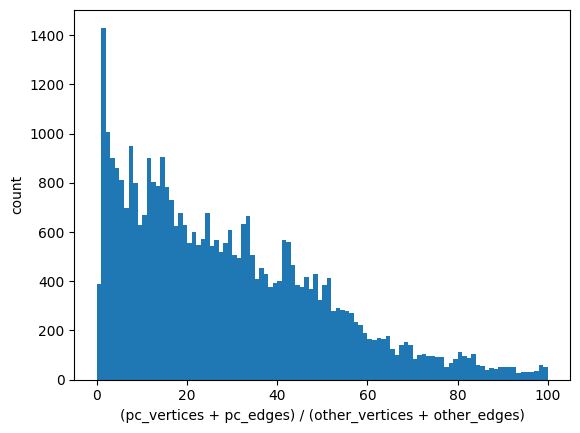

In [53]:
plt.hist(df["all"], bins=100, range=(0, 100))
plt.ylabel("count")
plt.xlabel("(pc_vertices + pc_edges) / (other_vertices + other_edges)")
plt.show()

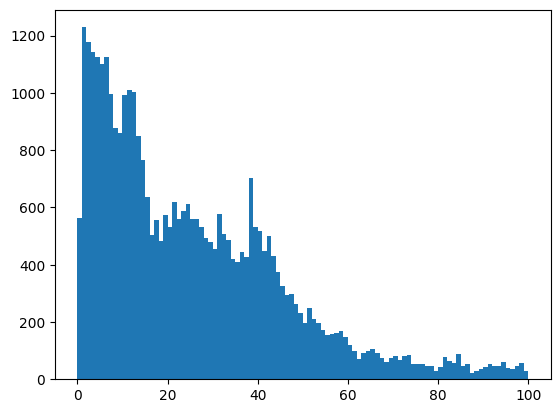

In [45]:
plt.hist(df["v"], bins=100, range=(0, 100))
plt.show()

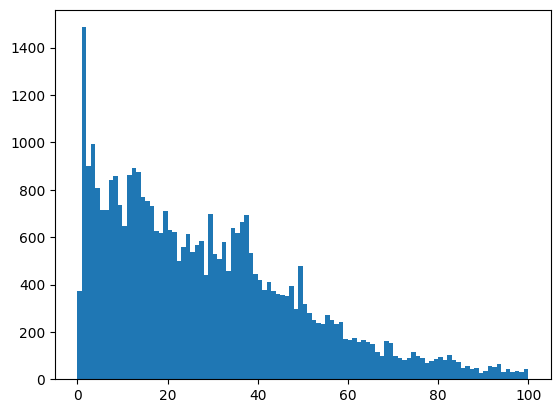

In [44]:
plt.hist(df["e"], bins=100, range=(0, 100))
plt.show()